In [227]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [228]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [229]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [230]:
train = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\train.csv", index_col=0)
train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0


수치형 변수 가공법

1. 멱함수 분포 변수 log1p 변환          - 가능, 성능향상
2. 정규화/스케일링                      - 가능, 하지만 성능향상은 없다.
3. Binning                              - 가능, 하지만 성능향상은 없다.
4. 2차 다항회귀 (Polynomial Regression) - 불가능, 이 대회는 분류대회이다. 회귀에서 사용가능


In [231]:
# Binning

# df["binning_observe"] = pd.qcut(df['nObserve'], 3, labels=False)
# df

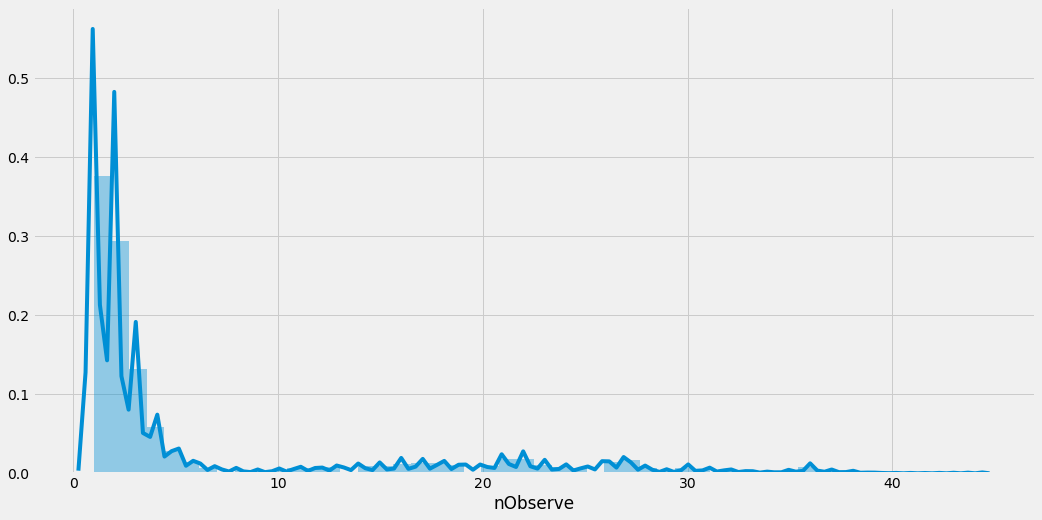

In [232]:
# 멱함수찾기

sns.distplot(train["nObserve"])

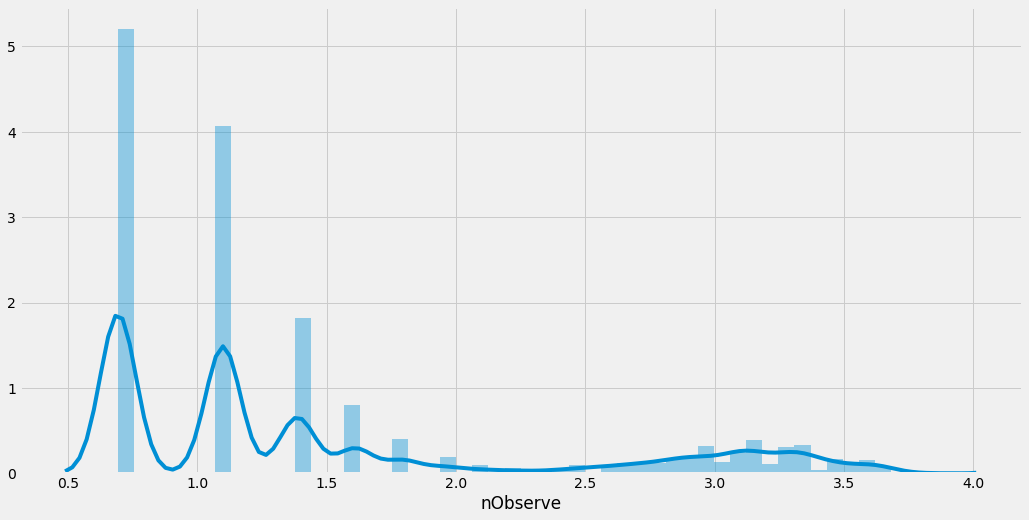

In [233]:
sns.distplot(np.log1p(train["nObserve"]))

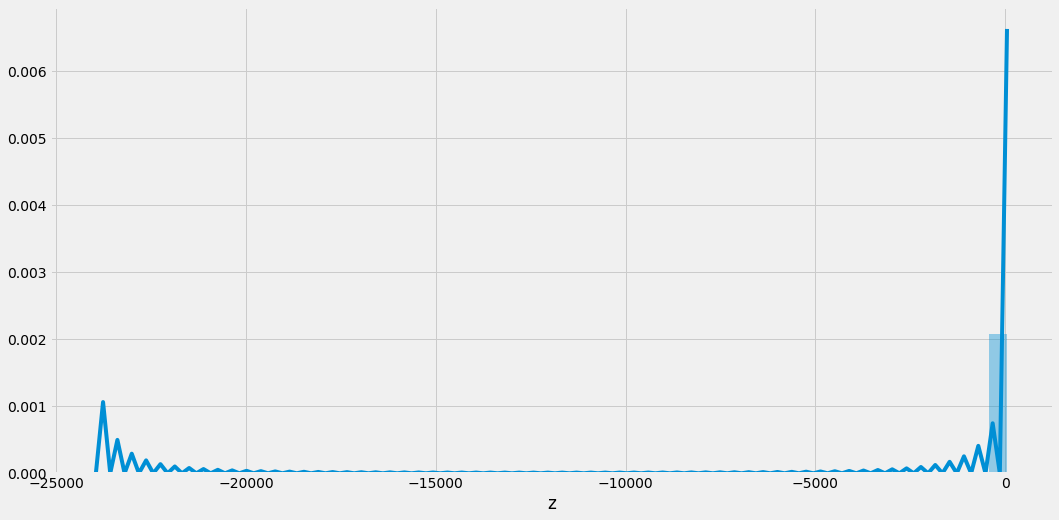

In [234]:
sns.distplot(train["z"])

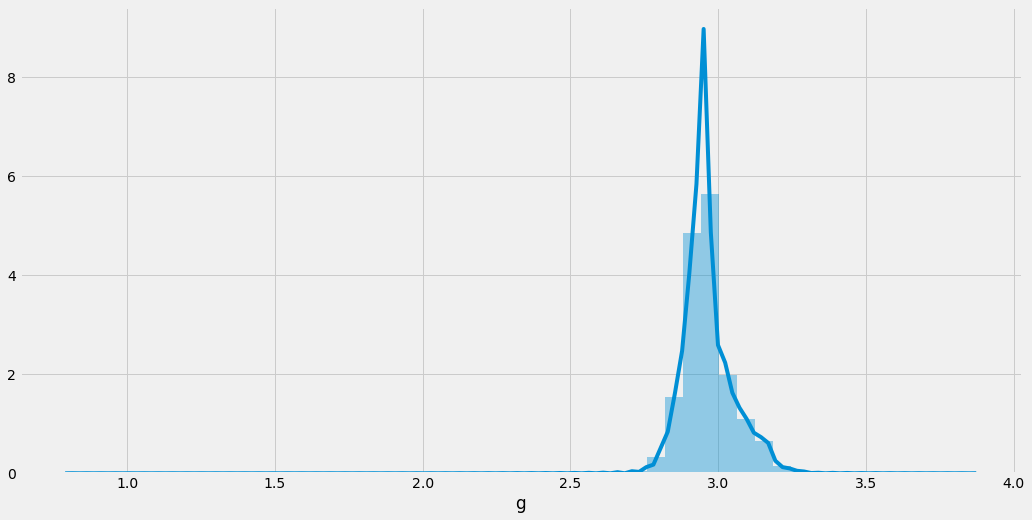

In [235]:
sns.distplot(np.log1p(train["g"]))

In [236]:
train[train["z"]<0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
56387,17.4398,27.1280,18.0392,16.2874,-9.2548,-0.0001,17.5434,29.4614,18.9975,16.3033,24.6393,4,4,1.3160,1.3256,1.3066,1.3113,1.3207,0
60199,18.9330,18.1413,17.6867,17.1591,-9791.5613,0.1490,18.7916,18.0306,17.6102,17.1023,-9999.0000,5,5,1.2437,1.2405,1.2470,1.2453,1.2421,2
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,0.0671,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
113850,-16.8679,15.2378,14.2443,14.5328,-7.2702,-0.0001,24.5219,15.1413,14.1972,14.5168,22.8491,2,1,1.2448,1.2487,1.2409,1.2428,1.2467,0
154264,19.4693,18.3495,17.9371,17.6015,-8030.3102,0.0743,19.3609,18.2590,17.8755,17.5565,-9999.0000,4,3,1.2926,1.2984,1.2869,1.2897,1.2955,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
174943,18.8070,-12.4441,22.5297,24.9915,-3.3308,0.0485,19.9280,25.0598,27.5411,27.7374,22.4782,4,1,1.0282,1.0261,1.0304,1.0292,1.0271,2
249594,14.9038,18.1590,15.3292,14.4725,-8.0998,0.1992,14.7288,18.1277,15.2376,14.4034,22.8040,2,2,1.2303,1.2226,1.2381,1.2342,1.2264,2
268213,15.9736,15.7488,15.6253,17.2440,-5.7287,0.0010,15.9349,15.7064,15.6015,17.2935,22.8847,1,1,1.1016,1.1026,1.1007,1.1011,1.1021,1


In [237]:
train["g"] = train["g"]+13
train = train.drop(train[train["g"]<0].index)
train["g"] = train["g"].apply(np.log1p)

train["i"] = train["i"]+24
train = train.drop(train[train["i"]<0].index)
train["i"] = train["i"].apply(np.log1p)

train["z"] = train["z"]+10
train = train.drop(train[train["z"]<0].index)
train["z"] = train["z"].apply(np.log1p)

train["nObserve"] = train["nObserve"].apply(np.log1p)
train["nDetect"] = train["nDetect"].apply(np.log1p)

train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,3.5362,19.0095,3.7536,3.3300,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,2.9444,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,3.3344,13.4524,3.6446,3.1851,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,0.6931,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,3.3954,15.5363,3.6987,3.2715,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0986,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,3.5607,20.2212,3.8043,3.4221,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.3863,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,3.5467,19.0424,3.7687,3.3667,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,2.5649,1.1939,1.1943,1.1937,1.1938,1.1941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.3656,3.4417,16.7739,3.7253,3.3084,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,1.0986,1.0986,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,3.4552,17.1904,3.7333,3.3191,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,1.0986,1.0986,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,3.4789,17.2956,3.7353,3.3209,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,3.4657,3.4340,1.1933,1.1941,1.1925,1.1929,1.1937,0


In [238]:
train["u-g"] = train["u"]-train["g"]
train["g-r"] = train["g"]-train["r"]
train["r-i"] = train["r"]-train["i"]
train["i-z"] = train["i"]-train["z"]

train["d1"] = train["dered_u"]-train["dered_g"]
train["d2"] = train["dered_g"]-train["dered_r"]
train["d3"] = train["dered_r"]-train["dered_i"]
train["d4"] = train["dered_i"]-train["dered_z"]


In [239]:
train2 = train.drop(["class","airmass_u","airmass_g","airmass_r","airmass_i","airmass_z"], axis=1)
train2

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,u-g,g-r,r-i,i-z,d1,d2,d3,d4
id,,,,,,,,,,,,,,,,,,,,,
0,23.2640,3.5362,19.0095,3.7536,3.3300,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,2.9444,19.7277,-15.4733,15.2559,0.4235,2.8665,1.3027,1.3230,0.7232
1,15.0521,3.3344,13.4524,3.6446,3.1851,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,0.6931,11.7177,-10.1180,9.8078,0.4596,0.9619,0.5931,0.1751,0.1016
2,16.7864,3.3954,15.5363,3.6987,3.2715,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0986,13.3910,-12.1410,11.8376,0.4272,0.9211,0.2466,0.1183,0.0257
3,25.6606,3.5607,20.2212,3.8043,3.4221,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.3863,22.0999,-16.6604,16.4168,0.3822,4.3590,0.9074,0.2926,0.2395
4,24.4534,3.5467,19.0424,3.7687,3.3667,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,2.5649,20.9067,-15.4957,15.2737,0.4020,3.3376,1.5709,0.6727,0.3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.3656,3.4417,16.7739,3.7253,3.3084,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,1.0986,1.0986,14.9239,-13.3322,13.0486,0.4170,1.0922,0.4032,0.2514,0.0986
319996,18.6856,3.4552,17.1904,3.7333,3.3191,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,1.0986,1.0986,15.2304,-13.7352,13.4571,0.4142,1.0076,0.4260,0.3435,0.1419
319997,21.1890,3.4789,17.2956,3.7353,3.3209,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,3.4657,3.4340,17.7101,-13.8167,13.5603,0.4145,2.6814,1.0924,0.3749,0.2048


In [240]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train2 = ss.fit_transform(train2)

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(n_jobs = -1)
acc = cross_val_score(lr, train2, train["class"], cv = 2,n_jobs = -1, scoring = "accuracy").mean()
print(acc)

# 0.8391

0.8391573667341167
